In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
%matplotlib inline

In [18]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [4]:
df = pd.read_csv("data/train.csv")

In [19]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.dtypes

Id                int64
MSSubClass        int64
                  ...  
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object

In [7]:
df.shape

(1460, 81)

### Duplicated Rows

In [8]:
len(df.drop_duplicates(keep=False))  / len(df)

1.0

### Missing Values

In [9]:
def checkna(df):
    return (df.isna().sum() / len(df))[(df.isna().sum() / len(df)).gt(0)]

In [10]:
checkna(df)

LotFrontage    0.177397
Alley          0.937671
                 ...   
Fence          0.807534
MiscFeature    0.963014
Length: 19, dtype: float64

### SalesPrice Distribution

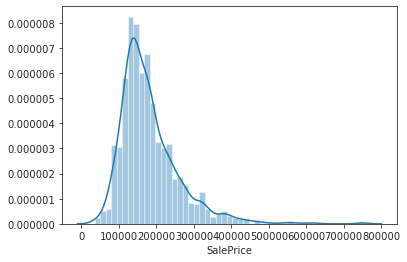

In [11]:
sns.distplot(df['SalePrice']);

### Exploration Data Analysis

/home/psmorelli/anaconda3/envs/code_red/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


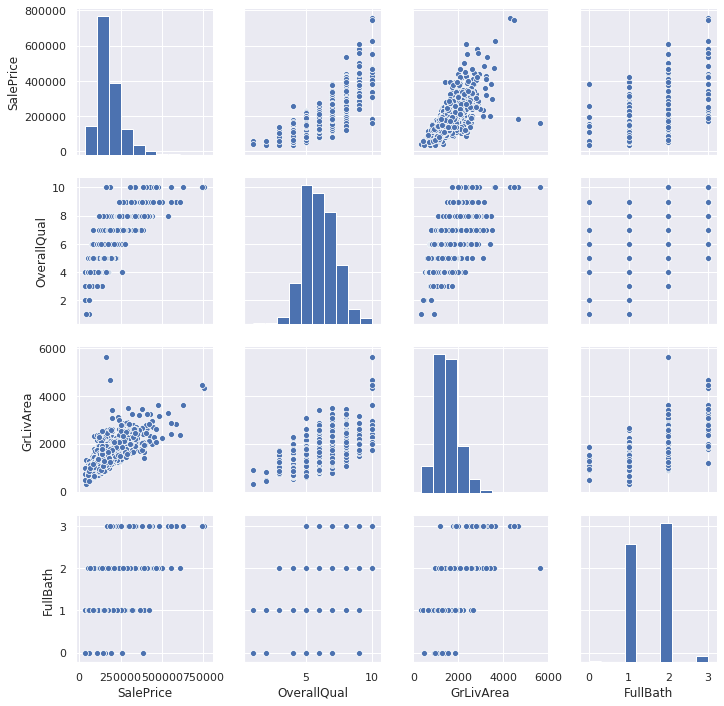

In [12]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea',"FullBath"]
sns.pairplot(df[cols], size = 2.5)
plt.show();

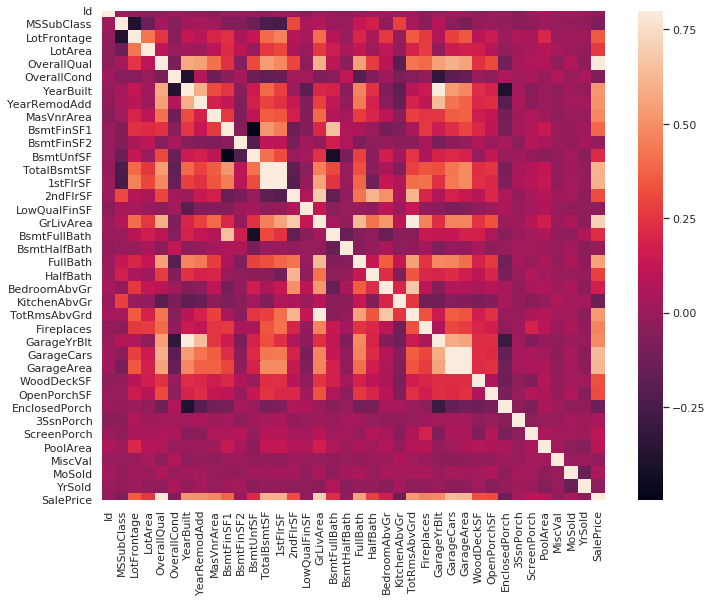

In [15]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

In [16]:
corr

,Id,MSSubClass,...,YrSold,SalePrice
Id,1.000000,0.011156,...,0.000712,-0.021917
MSSubClass,0.011156,1.000000,...,-0.021407,-0.084284
...,...,...,...,...,...
YrSold,0.000712,-0.021407,...,1.000000,-0.028923
SalePrice,-0.021917,-0.084284,...,-0.028923,1.000000


### Define Y and X variables
- Dammification categorical variables

In [43]:
y = df["SalePrice"]

In [44]:
x = df[["LotArea","GarageType"]]
x_numeric = x.select_dtypes(include=np.number)
x_categ = x.select_dtypes(exclude=np.number)


In [45]:
x_categ = pd.get_dummies(data=x_categ, drop_first=True)

In [46]:
x = pd.concat([x_numeric, x_categ], axis=1)

### Linear Regression

In [47]:
# add constant
x = x.assign(const=1)

In [48]:
# run OLS
lin_reg = sm.OLS(y,
                 x).fit()

In [49]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     97.04
Date:                Fri, 07 Feb 2020   Prob (F-statistic):          1.04e-102
Time:                        08:58:21   Log-Likelihood:                -18298.
No. Observations:                1460   AIC:                         3.661e+04
Df Residuals:                    1453   BIC:                         3.665e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
LotArea                1.5748      0.178      8.825      0.000       1.225       1.925
GarageType_Attchd   9.094e+04   7587.339     11.986      0.000    7.61e+04    1.06e+05
GarageType_Basment  5.034e+04    1.7e+04      2.955      0.003    1.69e+04    8.38e+04
GarageType_BuiltIn  1.421e+05   1.02e+04     13.938      0.000    1.22e+05    1.62e+05
GarageType_CarPort -2222.2442   2.36e+04     -0.094      0.925   -4.84e+04     4.4e+04
GarageType_Detchd   2.703e+04   7980.995      3.387      0.001    1.14e+04    4.27e+04
const                9.38e+04   7356.318     12.751      0.000    7.94e+04    1.08e+05
==============================================================================
Omnibus:                      690.931   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5986.690
Skew:                           2.009   Prob(JB):                         0.00
Kurtosis:                      12.071   Cond. No.                     2.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""